In [50]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 마이너스 폰트 깨짐 현상 수정
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
path = '/usr/share/fonts/truetype/naver-d2coding/D2Coding-Ver1.3.2-20180524-all.ttc'
font_name = fm.FontProperties(fname=path, size=15).get_name()
plt.rc('font', family=font_name)

# 스타일 서식 지정
plt.style.use('ggplot')

df = pd.read_excel('./data4/남북한발전전력량.xlsx', convert_float=True)
df = df.loc[0:4]



df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

df.head()

발전 전력별,합계,수력,화력,원자력,신재생
1990,1077,64,484,529,-
1991,1186,51,573,563,-
1992,1310,49,696,565,-
1993,1444,60,803,581,-
1994,1650,41,1022,587,-


In [57]:
# 증감률(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['전년도 총발전량'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량'] / df['전년도 총발전량']) - 1) * 100

df['신재생'] = np.where(df['신재생'] == '-', 0, df['신재생'])

# print(df['신재생'])

df.head()

발전 전력별,총발전량,수력,화력,원자력,신재생,전년도 총발전량,증감률
1990,1077,64,484,529,0,NaN,NaN
1991,1186,51,573,563,0,1077,10.1207
1992,1310,49,696,565,0,1186,10.4553
1993,1444,60,803,581,0,1310,10.229
1994,1650,41,1022,587,0,1444,14.2659


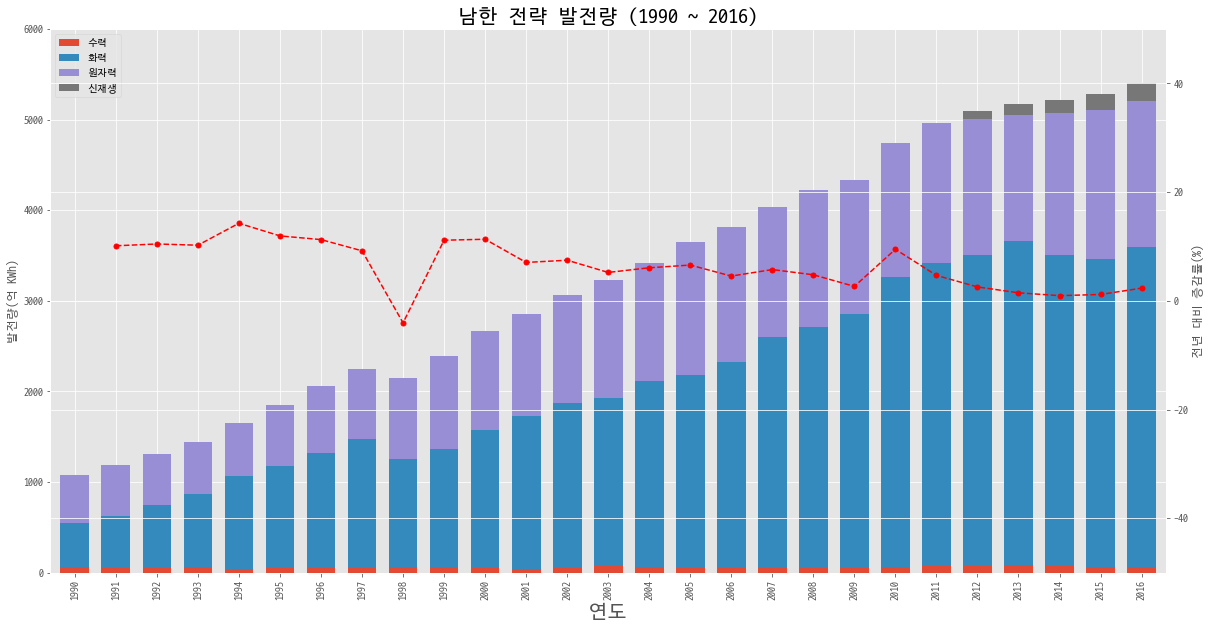

In [58]:
ax1 = df[['수력', '화력', '원자력', '신재생']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--', marker='o', markersize=5, color='red', label='전년대비 증감률(%)')

ax1.set_ylim(0, 6000)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('남한 전략 발전량 (1990 ~ 2016)', size=20)
ax1.legend(loc='upper left')

plt.show()